In [1]:
from app.ml.ml import LogoErrorChecker

a = LogoErrorChecker(
    # direction_path='ml/weights/classification_direction.onnx',
    # people_path='ml/weights/search_people.pt',
    # crop_path='ml/weights/classification_crop.onnx',
    # logo_path='ml/weights/logo_detector.pt'
)

a

Using CPU. Note: This module is much faster with a GPU.


In [2]:
from PIL import Image

image = Image.open('/home/dmitrii/Desktop/hack_22_06_24_school_of_programming/data/original/digital_economy/Примеры корректного брендирования/03614b22-6618-4183-adf0-c32422a21d27_3.jpg')
image = image.convert('RGB')

a.check_errors(image)

{'errors': [],
 'ocr_class': 'цифровая экономика',
 'bbox_results': [{'bbox': (439, 200, 918, 710, 0.8280251622200012),
   'cropped_class': 'None',
   'errors': [],
   'ocr_class': None,
   'color_class': ['цифровая экономика 65.06%',
    'наука и университеты 61.81%',
    'образование 13.32%',
    'демография 5.64%',
    'культура 2.64%']}]}

In [8]:
from app.ml.ml import LogoDetector

a = LogoDetector()

In [9]:
a.predict('/home/dmitrii/Desktop/hack_22_06_24_school_of_programming/data/original/digital_economy/Примеры корректного брендирования/03614b22-6618-4183-adf0-c32422a21d27_3.jpg')

[(439, 200, 918, 710, 0.8280251622200012)]

In [ ]:
{
    'demographics': [[65, 145, 235]],
    'culture': [[120, 110, 170], [100, 110, 200]],
    'digital economics': [[95, 135, 193]],
    'dorogi': [[210, 170, 85], [220, 200, 90]],
}

In [12]:
import cv2
import numpy as np
from collections import Counter

# Функция для подсчета количества пикселей, подходящих под каждый цвет
def count_matching_pixels(image, colors, threshold=35):
    counts = Counter()
    for color_name, color_values in colors.items():
        for color in color_values:
            diff = np.abs(image - np.array(color))
            mask = np.sum(diff, axis=-1) <= threshold
            count = np.count_nonzero(mask)
            counts[color_name] += count
    return counts

# Загрузка изображения
image_path = '/home/dmitrii/Desktop/hack_22_06_24_school_of_programming/data/classification_crop/dorogi/dorogi3.jpg'
image_path = '/home/dmitrii/Desktop/hack_22_06_24_school_of_programming/data/classification_crop/digital_economy/03614b22-6618-4183-adf0-c32422a21d27_3.jpg'
image_path = '/home/dmitrii/Desktop/hack_22_06_24_school_of_programming/data/classification_crop/demographics/2d150a9124f368b0c6386c68ca7bd82a.jpg'
image_path = '/home/dmitrii/Desktop/hack_22_06_24_school_of_programming/data/classification_crop/demographics/zqVJpAyFy90.jpg'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Определение цветов для каждого класса
colors = {
    'demographics': [[65, 145, 235], [75,165,200], [60, 125, 160]],
    'culture': [[120, 110, 170], [100, 110, 200]],
    'digital economics': [[95, 135, 193]],
    'dorogi': [[210, 170, 85], [220, 200, 90]],
    'ecology': [[150, 200, 130], [100, 185, 140], [75, 110, 85], [145, 180, 125], [80, 120, 60]],
    'education': [[125, 185, 220], [85, 190, 190], [75,115,175], [75,120,195], [110,155,180], [55,100,150]],
    'healthcare': [[200,45,75], [85,45,50], [175,55,65], [160,110,140], [180,50,50], [140,60,85]],
    'international-cooperation': [[45,55,70], [75,80,95]],
    'science-universities': [[60,135,185], [90,165,145], [80,165,120], [95,145,200], [80,140,205], [85,130,185]],
    'tourism': [[65,125,115], [85,170,155]],
}

# Подсчет количества подходящих пикселей для каждого класса
counts = count_matching_pixels(image, colors)

# Определение класса с максимальным количеством подходящих пикселей
most_common_class = counts.most_common(1)[0]
print(f"Class with the most matching pixels: {most_common_class[0]}, Pixels: {most_common_class[1]}")


Class with the most matching pixels: demographics, Pixels: 4844


In [17]:
import cv2
import numpy as np
from collections import Counter

# Функция для подсчета количества пикселей, подходящих под каждый цвет
def count_matching_pixels(image, colors, threshold=40):
    counts = Counter()
    height, width, _ = image.shape

    for y in range(height):
        for x in range(width):
            pixel = image[y, x]
            best_match_class = None
            min_diff = float('inf')

            for color_name, color_values in colors.items():
                for color in color_values:
                    diff = np.sum(np.abs(pixel - np.array(color)))
                    if diff <= threshold and diff < min_diff:
                        min_diff = diff
                        best_match_class = color_name

            if best_match_class:
                counts[best_match_class] += 1

    return counts

# Загрузка изображения
image_path = '/home/dmitrii/Desktop/hack_22_06_24_school_of_programming/data/classification_crop/dorogi/dorogi3.jpg'
image_path = '/home/dmitrii/Desktop/hack_22_06_24_school_of_programming/data/classification_crop/digital_economy/03614b22-6618-4183-adf0-c32422a21d27_3.jpg'
image_path = '/home/dmitrii/Desktop/hack_22_06_24_school_of_programming/data/classification_crop/demographics/2d150a9124f368b0c6386c68ca7bd82a.jpg'
image_path = '/home/dmitrii/Desktop/hack_22_06_24_school_of_programming/data/classification_crop/demographics/zqVJpAyFy90.jpg'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Определение цветов для каждого класса
colors = {
    'demographics': [[65, 145, 235], [75,165,200], [60, 125, 160]],
    'culture': [[120, 110, 170], [100, 110, 200]],
    'digital economics': [[95, 135, 193]],
    'dorogi': [[210, 170, 85], [220, 200, 90]],
    'ecology': [[150, 200, 130], [100, 185, 140], [75, 110, 85], [145, 180, 125], [80, 120, 60]],
    'education': [[125, 185, 220], [85, 190, 190], [75,115,175], [75,120,195], [110,155,180], [55,100,150]],
    'healthcare': [[200,45,75], [85,45,50], [175,55,65], [160,110,140], [180,50,50], [140,60,85]],
    'international-cooperation': [[45,55,70], [75,80,95]],
    'science-universities': [[60,135,185], [90,165,145], [80,165,120], [95,145,200], [80,140,205], [85,130,185]],
    'tourism': [[65,125,115], [85,170,155]],
}

counts = count_matching_pixels(image, colors)

most_common_class = counts.most_common(1)[0]
print(f"Class with the most matching pixels: {most_common_class[0]}, Pixels: {most_common_class[1]}")


Class with the most matching pixels: demographics, Pixels: 6444


In [18]:
counts

Counter({'demographics': 6444,
         'education': 5325,
         'healthcare': 3978,
         'science-universities': 1510,
         'digital economics': 145,
         'international-cooperation': 25,
         'culture': 3})

In [30]:
import cv2
import numpy as np
from collections import Counter

# Функция для подсчета количества пикселей, подходящих под каждый цвет
def count_matching_pixels(image, colors, threshold=40):
    height, width, _ = image.shape
    image_flat = image.reshape(-1, 3)
    counts = Counter()

    for color_name, color_values in colors.items():
        for color in color_values:
            color_array = np.array(color)
            diff = np.abs(image_flat - color_array)
            mask = np.sum(diff, axis=-1) <= threshold
            counts[color_name] += np.count_nonzero(mask)
    
    return counts


image_path = '/home/dmitrii/Desktop/hack_22_06_24_school_of_programming/data/classification_crop/dorogi/dorogi3.jpg'
image_path = '/home/dmitrii/Desktop/hack_22_06_24_school_of_programming/data/classification_crop/digital_economy/03614b22-6618-4183-adf0-c32422a21d27_3.jpg'
image_path = '/home/dmitrii/Desktop/hack_22_06_24_school_of_programming/data/classification_crop/demographics/2d150a9124f368b0c6386c68ca7bd82a.jpg'
image_path = '/home/dmitrii/Desktop/hack_22_06_24_school_of_programming/data/classification_crop/demographics/zqVJpAyFy90.jpg'


image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, c = image.shape

colors = {
    'demographics': [[65, 145, 235], [75,165,200], [60, 125, 160]],
    'culture': [[120, 110, 170], [100, 110, 200]],
    'digital economics': [[95, 135, 193]],
    'dorogi': [[210, 170, 85], [220, 200, 90]],
    'ecology': [[150, 200, 130], [100, 185, 140], [75, 110, 85], [145, 180, 125], [80, 120, 60]],
    'education': [[125, 185, 220], [85, 190, 190], [75,115,175], [75,120,195], [110,155,180], [55,100,150]],
    'healthcare': [[200,45,75], [85,45,50], [175,55,65], [160,110,140], [180,50,50], [140,60,85]],
    'international-cooperation': [[45,55,70], [75,80,95]],
    'science-universities': [[60,135,185], [90,165,145], [80,165,120], [95,145,200], [80,140,205], [85,130,185]],
    'tourism': [[65,125,115], [85,170,155]],
}

counts = count_matching_pixels(image, colors)

for key in counts.keys():
    counts[key] /= h * w

most_common_class = counts.most_common(1)[0]
print(f"Class with the most matching pixels: {most_common_class[0]}, Pixels: {most_common_class[1]}")

Class with the most matching pixels: education, Pixels: 0.10552952202436738


['culture',
 'demographics',
 'digital economics',
 'dorogi',
 'ecology',
 'education',
 'healthcare',
 'international-cooperation',
 'science-universities',
 'tourism']

In [24]:
h, w, c = image.shape
h * w

80025

In [1]:
import cv2
import numpy as np
from collections import Counter

# Функция для подсчета количества пикселей, подходящих под каждый цвет
def count_matching_pixels(image, colors, threshold=40):
    height, width, _ = image.shape
    image_flat = image.reshape(-1, 3)
    counts = Counter()
    masks = {color_name: np.zeros((height, width), dtype=np.uint8) for color_name in colors}

    for color_name, color_values in colors.items():
        for color in color_values:
            color_array = np.array(color)
            diff = np.abs(image_flat - color_array)
            mask = np.sum(diff, axis=-1) <= threshold
            mask = mask.reshape(height, width).astype(np.uint8)
            masks[color_name] = np.maximum(masks[color_name], mask)
            counts[color_name] += np.count_nonzero(mask)
    
    return counts, masks

image_path = '/home/dmitrii/Desktop/hack_22_06_24_school_of_programming/data/classification_crop/dorogi/dorogi3.jpg'
# image_path = '/home/dmitrii/Desktop/hack_22_06_24_school_of_programming/data/classification_crop/digital_economy/03614b22-6618-4183-adf0-c32422a21d27_3.jpg'
# image_path = '/home/dmitrii/Desktop/hack_22_06_24_school_of_programming/data/classification_crop/demographics/2d150a9124f368b0c6386c68ca7bd82a.jpg'
# image_path = '/home/dmitrii/Desktop/hack_22_06_24_school_of_programming/data/classification_crop/demographics/zqVJpAyFy90.jpg'


image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

colors = {
    'demographics': [[65, 145, 235], [75,165,200], [60, 125, 160]],
    'culture': [[120, 110, 170], [100, 110, 200]],
    'digital economics': [[95, 135, 193]],
    'dorogi': [[210, 170, 85], [220, 200, 90], [210,180,75], [200,175,75]],
    'ecology': [[150, 200, 130], [100, 185, 140], [75, 110, 85], [145, 180, 125], [80, 120, 60]],
    'education': [[125, 185, 220], [85, 190, 190], [75,115,175], [75,120,195], [110,155,180], [55,100,150]],
    'healthcare': [[200,45,75], [85,45,50], [175,55,65], [160,110,140], [180,50,50], [140,60,85]],
    'international-cooperation': [[45,55,70], [75,80,95]],
    'science-universities': [[60,135,185], [90,165,145], [80,165,120], [95,145,200], [80,140,205], [85,130,185]],
    'tourism': [[65,125,115], [85,170,155]],
}

# Подсчет количества подходящих пикселей для каждого класса и получение масок
counts, masks = count_matching_pixels(image, colors)

# Сохранение масок в файлы
for color_name, mask in masks.items():
    mask_filename = f'{color_name}_mask.png'
    cv2.imwrite(mask_filename, mask * 255)  # умножаем на 255, чтобы сделать маску видимой
    print(f"Mask for {color_name} saved as {mask_filename}")

# Определение класса с максимальным количеством подходящих пикселей
most_common_class = counts.most_common(1)[0]
print(f"Class with the most matching pixels: {most_common_class[0]}, Pixels: {most_common_class[1]}")


Mask for demographics saved as demographics_mask.png
Mask for culture saved as culture_mask.png
Mask for digital economics saved as digital economics_mask.png
Mask for dorogi saved as dorogi_mask.png
Mask for ecology saved as ecology_mask.png
Mask for education saved as education_mask.png
Mask for healthcare saved as healthcare_mask.png
Mask for international-cooperation saved as international-cooperation_mask.png
Mask for science-universities saved as science-universities_mask.png
Mask for tourism saved as tourism_mask.png
Class with the most matching pixels: dorogi, Pixels: 38919


In [41]:
import cv2
import numpy as np
from collections import Counter
from PIL import Image

class ImageClassifier:
    def __init__(self, threshold=40):
        self.threshold = threshold
        self.colors = {
            'demographics': [[65, 145, 235], [75,165,200], [60, 125, 160]],
            'culture': [[120, 110, 170], [100, 110, 200]],
            'digital economics': [[95, 135, 193]],
            'dorogi': [[210, 170, 85], [220, 200, 90]],
            'ecology': [[150, 200, 130], [100, 185, 140], [75, 110, 85], [145, 180, 125], [80, 120, 60]],
            'education': [[125, 185, 220], [85, 190, 190], [75,115,175], [75,120,195], [110,155,180], [55,100,150]],
            'healthcare': [[200,45,75], [85,45,50], [175,55,65], [160,110,140], [180,50,50], [140,60,85]],
            'international-cooperation': [[45,55,70], [75,80,95]],
            'science-universities': [[60,135,185], [90,165,145], [80,165,120], [95,145,200], [80,140,205], [85,130,185]],
            'tourism': [[65,125,115], [85,170,155]],
        }

    def count_matching_pixels(self, pil_image):
        image = np.array(pil_image)
        height, width, _ = image.shape
        image_flat = image.reshape(-1, 3)
        counts = Counter()

        for color_name, color_values in self.colors.items():
            for color in color_values:
                color_array = np.array(color)
                diff = np.abs(image_flat - color_array)
                mask = np.sum(diff, axis=-1) <= self.threshold
                counts[color_name] += np.count_nonzero(mask)

        for key in counts.keys():
            counts[key] /= h * w
            counts[key] *= 100
            counts[key] = round(counts[key], 2)
        
        return counts


image_path = '/home/dmitrii/Desktop/hack_22_06_24_school_of_programming/data/classification_crop/demographics/zqVJpAyFy90.jpg'
pil_image = Image.open(image_path)

classifier = ImageClassifier()
counts = classifier.count_matching_pixels(pil_image)

top_5 = sorted(counts.items(), key=lambda item: item[1], reverse=True)[:5]

top_5

[('education', 10.55),
 ('demographics', 10.04),
 ('healthcare', 7.73),
 ('science-universities', 6.09),
 ('digital economics', 1.53)]

In [2]:
from collections import Counter
# Пример Counter
counter = Counter({'a': 15, 'b': 9, 'c': 20, 'd': 5})

# Получение ключей с значениями больше 10
keys_with_values_greater_than_10 = [key for key, value in counter.items() if value > 10]

print(keys_with_values_greater_than_10)

['a', 'c']


In [5]:
a = [(1,3), (4,2), (2,5)]

a.sort(key=lambda k: k[1], reverse=True)

In [6]:
a

[(2, 5), (1, 3), (4, 2)]

In [1]:
from PIL import Image, ImageDraw
import tempfile

image = Image.open('/Users/dmitrykutsenko/Desktop/hack_22_06_24_school_of_programming/data/original/demographics/Примеры некорректного брендирования/5 н.jpg')


error = 0
draw = ImageDraw.Draw(image)
caption = "<b>Распознанные ошибки:</b>\n"

bbox = [100, 100, 200, 400]
if isinstance(bbox, (list, tuple)) and len(bbox) >= 4:
    bbox = tuple(map(int, bbox[:4]))
    draw.rectangle(bbox, outline="red", width=2)

# Сохранение временного файла с отмеченными логотипами
with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as tmp_file:
    image.save(tmp_file, format='PNG')
    tmp_file_path = tmp_file.name

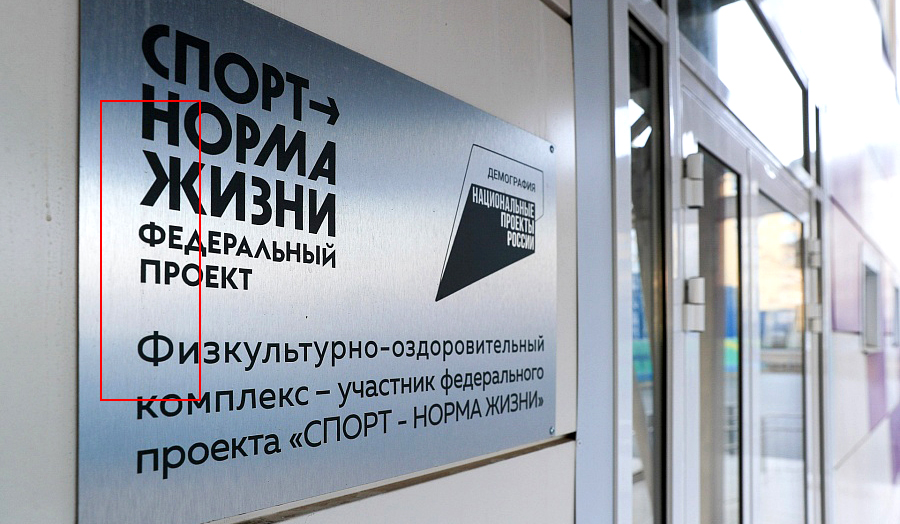

In [2]:
image